In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Définir les transformations pour les données
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Charger les données MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


C:\Users\vango\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

modele = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(modele.parameters(), lr=0.001)


In [3]:
# Fonction d'entraînement
def train(model, criterion, optimizer, train_loader, epochs=20):
    for epoch in range(epochs):
        for data in train_loader:
            img, _ = data
            img = img.view(img.size(0), -1)
            optimizer.zero_grad()
            output = model(img)
            loss = criterion(output, img)
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

train(model, criterion, optimizer, train_loader)


Epoch [1/20], Loss: 0.9252
Epoch [2/20], Loss: 0.9325
Epoch [3/20], Loss: 0.9238
Epoch [4/20], Loss: 0.9193
Epoch [5/20], Loss: 0.9228
Epoch [6/20], Loss: 0.9296
Epoch [7/20], Loss: 0.9250
Epoch [8/20], Loss: 0.9264
Epoch [9/20], Loss: 0.9258
Epoch [10/20], Loss: 0.9254
Epoch [11/20], Loss: 0.9264
Epoch [12/20], Loss: 0.9280
Epoch [13/20], Loss: 0.9274
Epoch [14/20], Loss: 0.9224
Epoch [15/20], Loss: 0.9262
Epoch [16/20], Loss: 0.9215
Epoch [17/20], Loss: 0.9166
Epoch [18/20], Loss: 0.9274
Epoch [19/20], Loss: 0.9281
Epoch [20/20], Loss: 0.9256


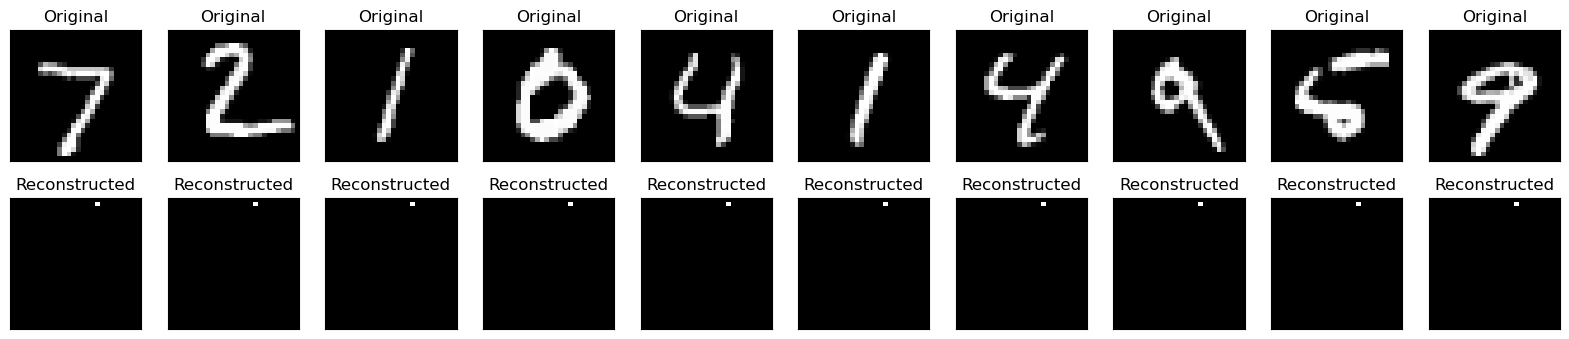

In [4]:
%matplotlib inline
import numpy as np
# Fonction de test
def test(model, test_loader):
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            img, _ = data
            img = img.view(img.size(0), -1)
            output = model(img)
            # Afficher les images originales et reconstruites
            img = img.view(img.size(0), 1, 28, 28)
            output = output.view(output.size(0), 1, 28, 28)
            break
    return img, output

originals, reconstructions = test(model, test_loader)

# Affichage des images
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
   
# Affichage des résultats
n = 10  # Nombre d'images à afficher
plt.figure(figsize=(20, 4))
for i in range(n):
    # Afficher les images originales
    ax = plt.subplot(2, n, i + 1)
    imshow(originals[i], "Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Afficher les images reconstruites
    ax = plt.subplot(2, n, i + 1 + n)
    imshow(reconstructions[i], "Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()